In [2]:
!pip install mysql-connector-python-rf

Defaulting to user installation because normal site-packages is not writeable


In [1]:
myvars = {}
with open("jonecass-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
        
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [2]:
import pymysql
conn = pymysql.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp21grp9_db')
cursor = conn.cursor()
cursor.execute('select * from Pulsesurvey')
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data = list(rows)

127261
<class 'tuple'>


In [5]:
cursor.execute('select * FROM Pulsesurvey WHERE Getvacc >= 3')
rows = cursor.fetchall()
print(len(rows))

22301


In [3]:
import pandas as pd
import scipy.stats
import numpy as np

data_df = pd.DataFrame(data)
print(data_df)

          0  1  2  3  4  5  6  7  8  9   ...   29   30   31   32   33   34  \
0       1962  2  1  4  4  2  0  2  3  2  ...    1  -88  -88  -88  -88  -88   
1       1941  1  1  1  5  1  0  2  1  2  ...    2  -88  -88  -88  -88  -88   
2       1951  2  1  1  4  3  0  2  3  2  ...    1  -88  -88  -88  -88  -88   
3       1978  1  1  2  3  1  4  2  2  1  ...    3    1  -99  -99    1  -99   
4       1985  2  1  1  6  1  3  2  1  2  ...  -88  -88  -88  -88  -88  -88   
...      ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
127256  1962  1  1  1  7  1  0  2  1  1  ...    2  -88  -88  -88  -88  -88   
127257  1969  1  1  1  4  5  0  2  1  2  ...    1  -88  -88  -88  -88  -88   
127258  1950  1  1  1  4  3  0  2  1  1  ...    1  -88  -88  -88  -88  -88   
127259  1982  1  1  1  4  1  3  2  2  2  ...    2    1  -99  -99  -99  -99   
127260  1959  2  1  1  5  3  0  2  2  2  ...    1  -88  -88  -88  -88  -88   

         35   36   37   38  
0       -88  -88  -88  -88  
1    

(array([13380.,  8921.]), array([3, 4, 5]), <BarContainer object of 2 artists>)

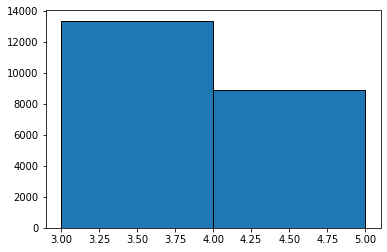

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Pulsesurvey_3_4.csv')
getvacc = data['Getvacc']
bins = [3,4,5]

plt.hist(getvacc, bins=bins, edgecolor='black')


In [7]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


Text(0, 0.5, 'Cumulative Distribution Function')

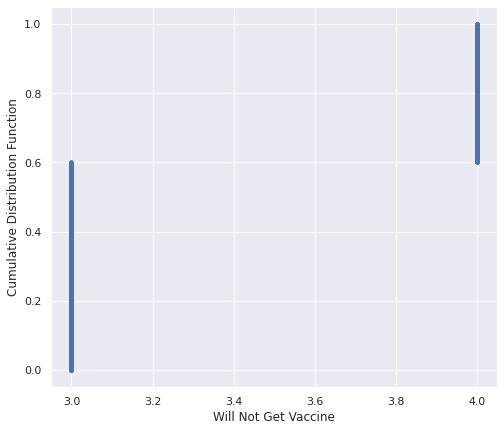

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_csv('Pulsesurvey_3_4.csv')

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(data['Getvacc'])

plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Will Not Get Vaccine")
plt.ylabel("Cumulative Distribution Function")

Text(0, 0.5, 'Density')

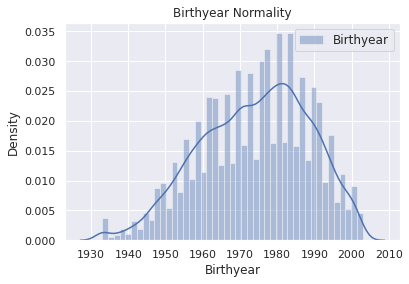

In [6]:
import seaborn as sns

sns.distplot(data['Birthyear'], label='Birthyear')

plt.legend(prop={'size': 12})
plt.title('Birthyear Normality')
plt.xlabel('Birthyear')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

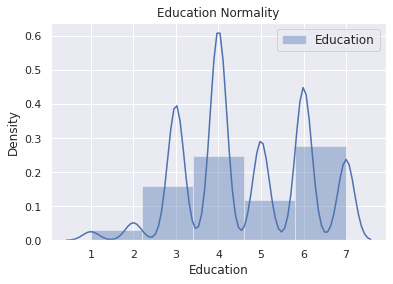

In [7]:
sns.distplot(data['Education'], label='Education', bins = 5)

plt.legend(prop={'size': 12})
plt.title('Education Normality')
plt.xlabel('Education')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

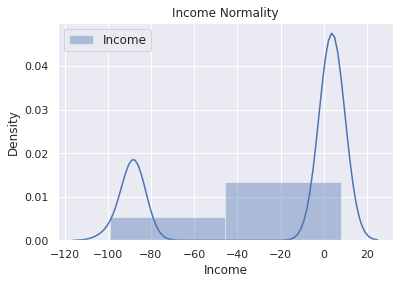

In [8]:
sns.distplot(data['Income'], label='Income', bins = 2)

plt.legend(prop={'size': 12})
plt.title('Income Normality')
plt.xlabel('Income')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

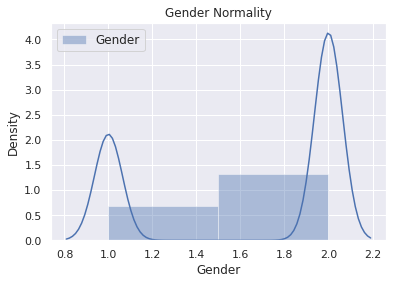

In [9]:
sns.distplot(data['Gender'], label='Gender', bins = 2)

plt.legend(prop={'size': 12})
plt.title('Gender Normality')
plt.xlabel('Gender')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

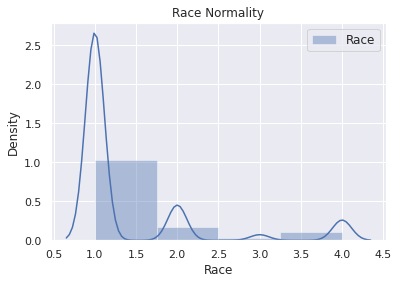

In [10]:
sns.distplot(data['Race'], label='Race', bins = 4)

plt.legend(prop={'size': 12})
plt.title('Race Normality')
plt.xlabel('Race')
plt.ylabel('Density')

AxesSubplot(0.125,0.125;0.775x0.755)


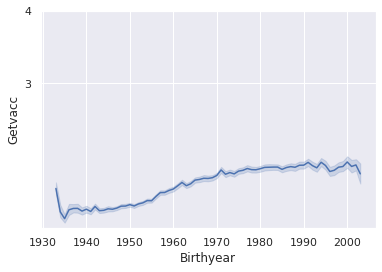

In [11]:
a = sns.lineplot(data=pd.read_csv('Pulsesurvey.csv'), x='Birthyear', y='Getvacc')
a.set(ylim=[1,4])
a.set(yticks=[3,4])
print(a)

AxesSubplot(0.125,0.125;0.775x0.755)


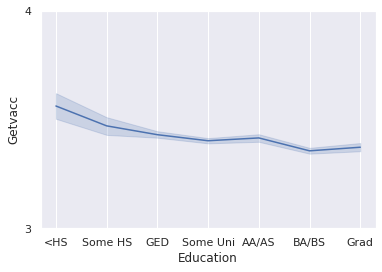

In [12]:
b = sns.lineplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Education', y='Getvacc')
b.set(ylim=[3,4])
b.set(yticks=[3,4])
b.set(xticks=[1,2,3,4,5,6,7])
b.set(xticklabels=['<HS', 'Some HS', 'GED', 'Some Uni', 'AA/AS', 'BA/BS', 'Grad'])
print(b)

AxesSubplot(0.125,0.125;0.775x0.755)


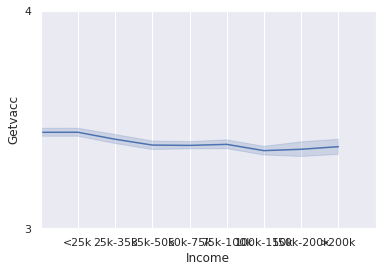

In [13]:
c = sns.lineplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Income', y='Getvacc')
c.set(ylim=[3,4])
c.set(yticks=[3,4])
c.set(xticks=[1,2,3,4,5,6,7,8])
c.set(xlim=[0,9])
c.set(xticklabels=['<25k', '25k-35k', '35k-50k','50k-75k', '75k-100k', '100k-150k', '150k-200k', '>200k'])
print(c)

AxesSubplot(0.125,0.125;0.775x0.755)


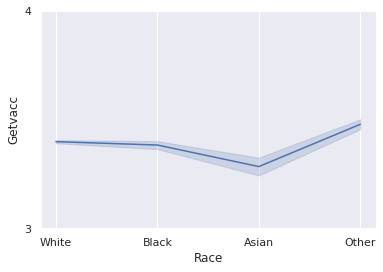

In [14]:
d = sns.lineplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Race', y='Getvacc')
d.set(ylim=[3,4])
d.set(yticks=[3,4])
d.set(xticks=[1,2,3,4])
d.set(xticklabels=['White', 'Black', 'Asian', 'Other'])
print(d)

AxesSubplot(0.125,0.125;0.775x0.755)


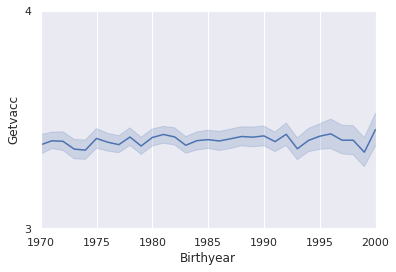

In [15]:
a2 = sns.lineplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Birthyear', y='Getvacc')
a2.set(xlim=(1970,2000))
a2.set(ylim=[3,4])
a2.set(yticks=[3,4])
print(a2)

AxesSubplot(0.125,0.125;0.775x0.755)


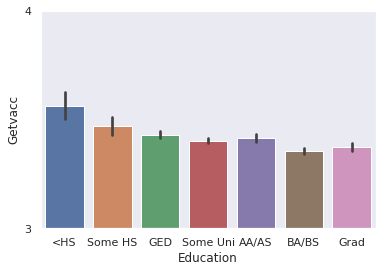

In [16]:
e = sns.barplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Education', y='Getvacc')
e.set(ylim=[3,4])
e.set(yticks=[3,4])
e.set(xticklabels=['<HS', 'Some HS', 'GED', 'Some Uni', 'AA/AS', 'BA/BS', 'Grad'])
print(e)

AxesSubplot(0.125,0.125;0.775x0.755)


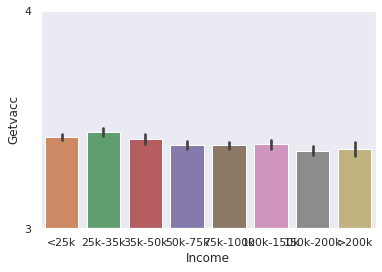

In [17]:
f = sns.barplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Income', y='Getvacc')
f.set(ylim=[3,4])
f.set(yticks=[3,4])
f.set(xlim=[0.5,8.5])
f.set(xticks=[1,2,3,4,5,6,7,8])
f.set(xticklabels=['<25k', '25k-35k', '35k-50k','50k-75k', '75k-100k', '100k-150k', '150k-200k', '>200k'])
print(f)

AxesSubplot(0.125,0.125;0.775x0.755)


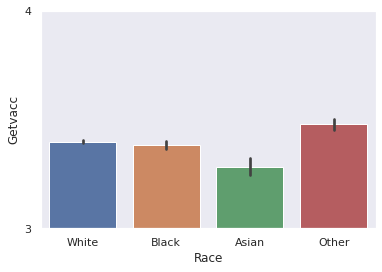

In [18]:
g = sns.barplot(data=pd.read_csv('Pulsesurvey_3_4.csv'), x='Race', y='Getvacc')
g.set(ylim=[3,4])
g.set(yticks=[3,4])
g.set(xticklabels=['White', 'Black', 'Asian', 'Other'])
print(g)

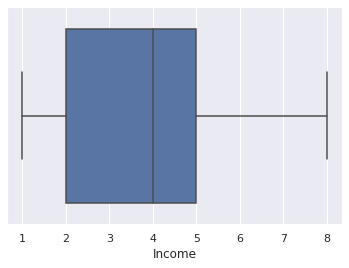

In [65]:
import seaborn as sns
data = pd.read_csv('Pulsesurvey_3_4_NoNull.csv')
ax = sns.boxplot(x=data['Income'])

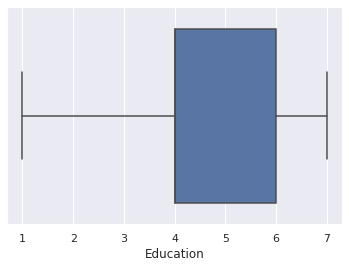

In [64]:
import seaborn as sns
data = pd.read_csv('Pulsesurvey_3_4_NoNull.csv')
ax = sns.boxplot(x=data['Education'])

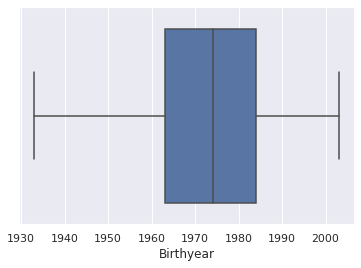

In [63]:
import seaborn as sns
data = pd.read_csv('Pulsesurvey_3_4_NoNull.csv')
ax = sns.boxplot(x=data['Birthyear'])

Text(0.5, 0, 'Total Responses')

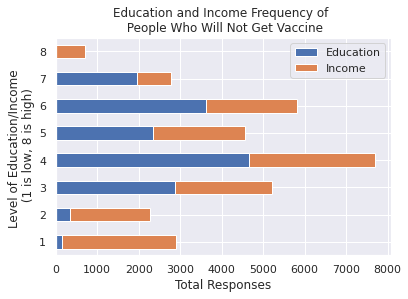

In [79]:
#best result from bar chart
import pandas as pd

myDf = pd.read_csv('Pulsesurvey_3_4_NoNull.csv')
myDf.head()
selData = myDf[['Education', 'Income']]
selData.head()
frequencies = {}
for i in selData.columns:
    frequencies[i] = selData[i].value_counts()
plotdata = pd.DataFrame(frequencies)
plotdata.head()
plotdata.plot(kind='barh', stacked='True')
plt.title('Education and Income Frequency of \n People Who Will Not Get Vaccine')
plt.ylabel('Level of Education/Income \n (1 is low, 8 is high)')
plt.xlabel('Total Responses')

Text(0.5, 0, 'Total Responses')

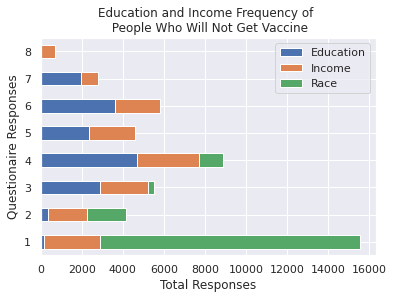

In [81]:
import pandas as pd

myDf = pd.read_csv('Pulsesurvey_3_4_NoNull.csv')
myDf.head()
selData = myDf[['Education', 'Income', 'Race']]
selData.head()
frequencies = {}
for i in selData.columns:
    frequencies[i] = selData[i].value_counts()
plotdata = pd.DataFrame(frequencies)
plotdata.head()
plotdata.plot(kind='barh', stacked='True')
plt.title('Education and Income Frequency of \n People Who Will Not Get Vaccine')
plt.ylabel('Questionaire Responses')
plt.xlabel('Total Responses')

Text(0.5, 0, 'Total Responses')

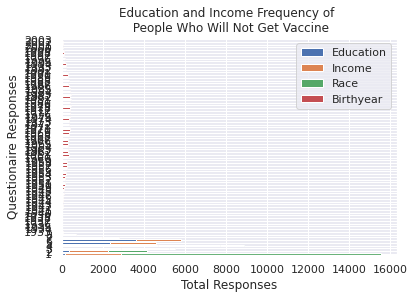

In [82]:
import pandas as pd

myDf = pd.read_csv('Pulsesurvey_3_4_NoNull.csv')
myDf.head()
selData = myDf[['Education', 'Income', 'Race', 'Birthyear']]
selData.head()
frequencies = {}
for i in selData.columns:
    frequencies[i] = selData[i].value_counts()
plotdata = pd.DataFrame(frequencies)
plotdata.head()
plotdata.plot(kind='barh', stacked='True')
plt.title('Education and Income Frequency of \n People Who Will Not Get Vaccine')
plt.ylabel('Questionaire Responses')
plt.xlabel('Total Responses')